<a href="https://colab.research.google.com/github/CristopherFoster/ML_Centrogeo_CEFV/blob/Tareas/Tarea_1_ML_CEFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import numpy as np

def transformacion_afin(theta, s1, s2, h, b1, b2, points):
    """
    Aplica una transformación afín a un conjunto de puntos en 2D.

    Parámetros:
    theta (float): Ángulo de rotación en radianes.
    s1 (float): Factor de escala en el eje x.
    s2 (float): Factor de escala en el eje y.
    h (float): Factor de cizallamiento en el eje x.
    b1 (float): Traslación en el eje x.
    b2 (float): Traslación en el eje y.
    points (numpy.ndarray): Conjunto de puntos 2D a transformar,
                            debe ser un array de forma (n, 2)
                            donde n es el número de puntos.

    Tipo de output:
    numpy.ndarray: Conjunto de puntos transformados, de la misma forma (n, 2).
    """

    # Matriz de rotación R
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

    # Matriz de escala S
    S = np.array([
        [s1, 0],
        [0, s2]
    ])

    # Matriz de deslizamiento (cizalla) H (shearing)
    H = np.array([
        [1, h],
        [0, 1]
    ])

    # Combinación de transformaciones
    A = R @ S @ H

    # Aplicar la transformación afín
    puntos_transformados = A @ points.T
    puntos_transformados[0, :] += b1
    puntos_transformados[1, :] += b2

    return puntos_transformados.T


In [24]:
# Puntos de muestra (un cuadrado)
points = np.array([
    [0, 0],
    [6, 0],
    [6, 6],
    [0, 6],
    [0, 0]
])

# Parámetros de la transformación
#Angulo de giro
theta = np.pi / 3
#Reescalamiento
s1 = 0.5
s2 = 1
#Cizalla
h = 0.8
#Nuevo punto de origen
b1 = 0
b2 = 0

# Aplicar la transformación
pt = transformacion_afin(theta, s1, s2, h, b1, b2, points)


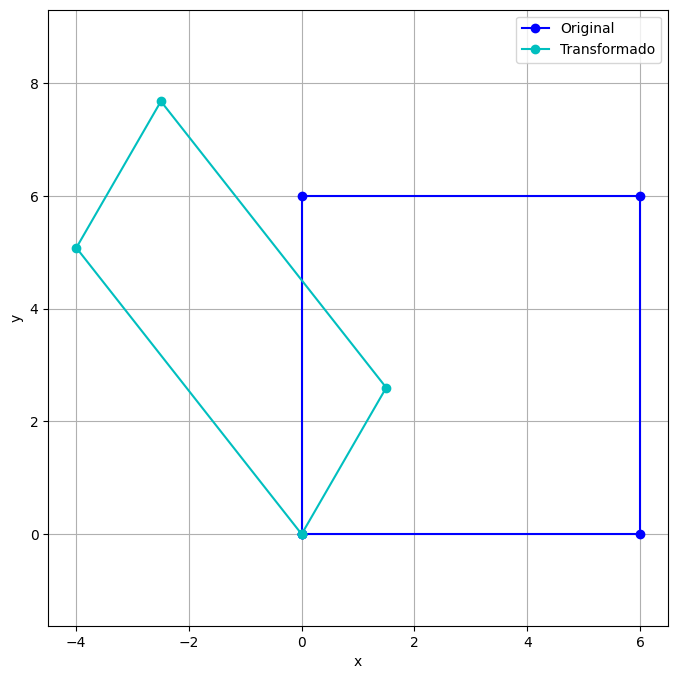

In [25]:
# Graficar los puntos originales y transformados
plt.figure(figsize=(8, 8))
plt.plot(points[:, 0], points[:, 1], 'bo-', label='Original')
plt.plot(pt[:, 0], pt[:, 1], 'co-', label='Transformado')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()